In [2]:
#This is Joe's exploratory scratch workb

In [3]:
#!pip install descartes

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# import geopandas as geo
# import descartes as des

#from shapely.geometry import Point, Polygon
%matplotlib inline


In [6]:
#from function_library import *

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/houston-ds-042219-mod1-project/master/kc_house_data.csv')




In [8]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

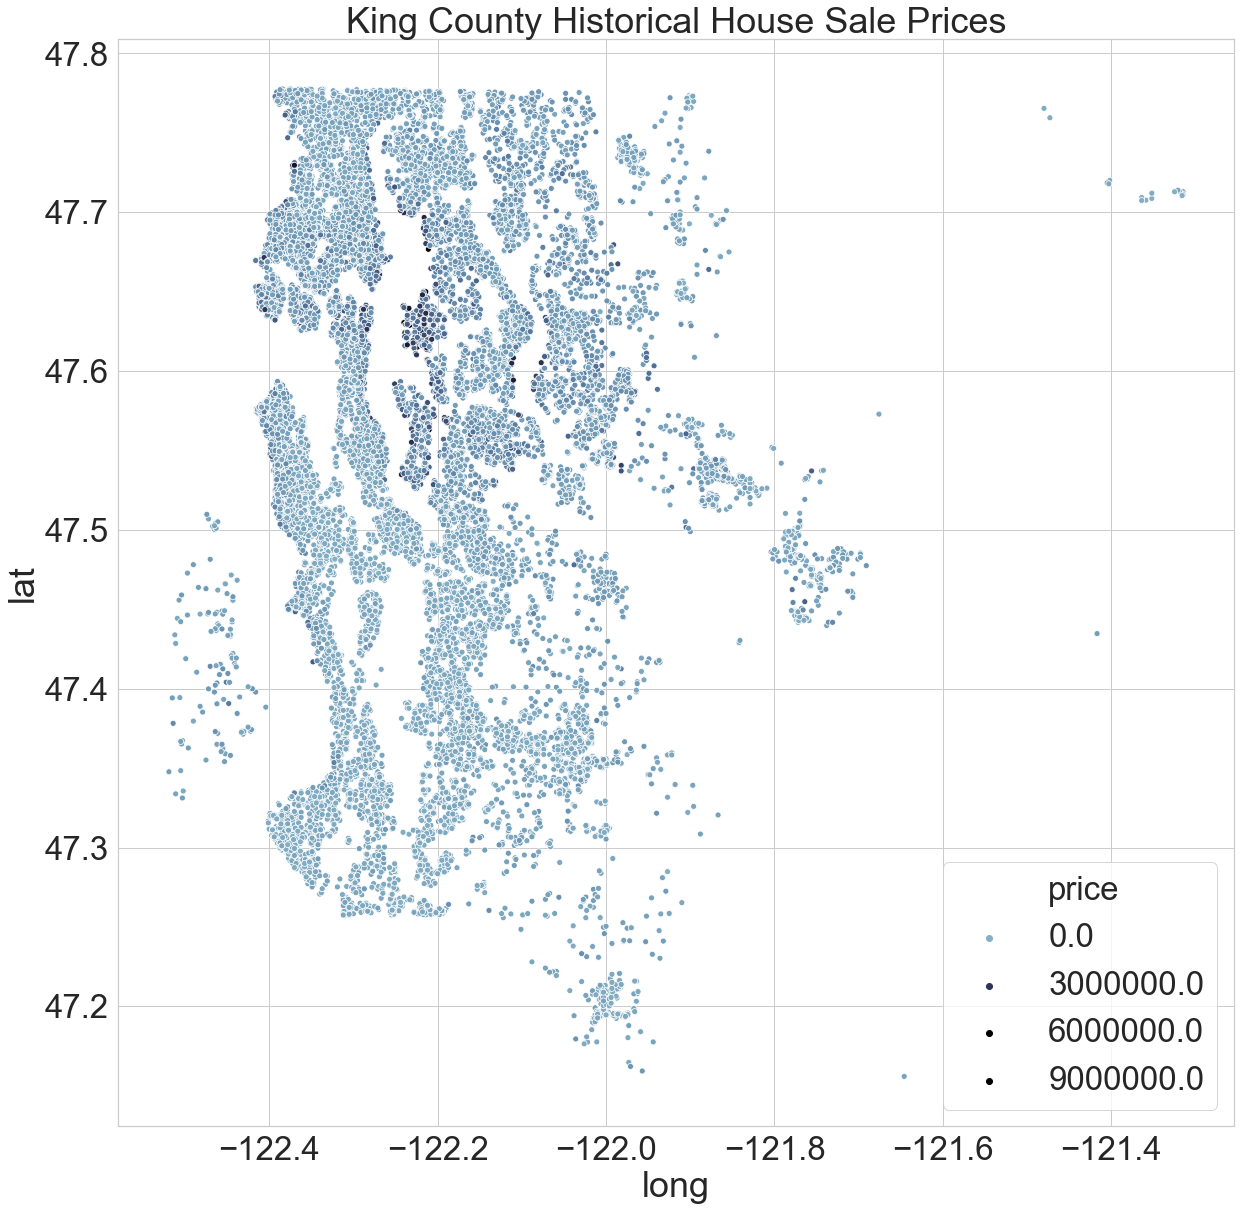

In [28]:
sns.set(font_scale = 3, style='whitegrid')
plt.figure(figsize=(20,20))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True, light =.65, dark = -.5)
#cmap = sns.color_palette('bright', n_colors=6)
#plt.xticks(rotation=90)
#plt.yticks(rotation=90)
plt.title('King County Historical House Sale Prices')

#plt.xlabel('Lattitude')
ax = sns.scatterplot(x=df.long, y=df.lat,
                     hue=df.price, 
                     palette=cmap, sizes=(200, 200))

In [ ]:
df.shape

In [ ]:
sqft_basement = df.groupby(df.sqft_basement)['sqft_basement'].value_counts()

In [ ]:
sqft_basement

In [ ]:
print(2376+63)

In [ ]:
df.isna().sum()

In [ ]:
print((2376+63)/21597)

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
by_zipcode = df.groupby('zipcode')['price'].describe()

In [ ]:
by_zipcode2.head()

In [ ]:
by_zipcode['zipcode']= by_zipcode.index

In [ ]:
by_zipcode.head()

In [ ]:
by_zipcode.sort_values('mean', ascending=False, inplace = True)

In [ ]:
by_zipcode.set_index('mean', inplace=True)

In [ ]:
by_zipcode.head()

In [ ]:
by_zipcode['mean']=by_zipcode.index

In [ ]:
by_zipcode.head(10)

In [ ]:
by_zipcode['zipcode_copy'] = by_zipcode['zipcode'].map(lambda x: '#{:d}'.format(x))

In [ ]:
by_zipcode.sort_values('mean', inplace=True)

In [ ]:
fig,ax = plt.subplots(figsize=(10,15))
sns.barplot(x='mean', y='zipcode_copy', data=by_zipcode[-25:], ax=ax, orient='h')
ax.set_xlabel('Home Value')
ax.set_ylabel('Zipcode')
ax.set_title('Top 25 Zipcodes by Home Value')

# a4_dims = (11.7, 8.27)
# df = mylib.load_data()
# fig, ax = pyplot.subplots(figsize=a4_dims)
# seaborn.violinplot(ax=ax, data=df, **violin_options)

In [ ]:
by_zipcode.tail(25)

In [ ]:
fig,ax = plt.subplots(figsize=(10,15))
sns.barplot(x='mean', y='zipcode_copy', data=by_zipcode.head(25), ax=ax, orient='h')
ax.set_xlabel('Home Value')
ax.set_ylabel('Zipcode')
ax.set_title('Bottom 25 Zipcodes by Home Value')

In [ ]:
df.size

In [ ]:
df.isna().sum()

In [ ]:
df.waterfront.mean()


In [ ]:
#df.dtypes


In [ ]:
housing_values = df


In [ ]:
type(housing_values.waterfront.fillna(0, inplace = True))

In [ ]:
housing_values.waterfront.median()

In [ ]:
housing_values.waterfront.fillna(0, inplace= True)
                                

In [ ]:
housing_values.view.median()

In [ ]:
housing_values.view.fillna(housing_values.view.median(), inplace=True)

In [ ]:
housing_values.yr_renovated.mean()

In [ ]:
housing_values.yr_renovated.median()

In [ ]:
housing_values.yr_renovated.fillna(housing_values.yr_renovated.median(), inplace=True)

In [ ]:
housing_values.dtypes

In [ ]:
#df.isna().sum()

In [ ]:
housing_values.sqft_basement.replace('?','0',inplace=True)

In [ ]:
housing_values.sqft_basement = pd.to_numeric(housing_values.sqft_basement)

In [ ]:
# f, axes = plt.subplots(4, 5)

# for x, column in enumerate(housing_values.drop(['id','date'], axis=1).columns):
#     sns.distplot(housing_values[column], ax=axes[x//4,x%3])

In [ ]:
for column in housing_values.drop(['id','date'], axis=1).columns:
     sns.distplot(housing_values[column])
     plt.show()

In [ ]:
pairplot_df = df.drop(['id','date'],axis=1)
 


In [ ]:
pairplot_df.head()

In [ ]:
#sns.pairplot(pairplot_df)

In [ ]:
housing_values.columns

In [ ]:
X.shape


In [ ]:
y.shape



In [ ]:
type(y)


In [ ]:
type(X)



In [ ]:
X.dtypes


In [ ]:
X = housing_values.drop(['id','date','price','view','floors','condition','yr_renovated','zipcode','lat','long'],axis=1)
y = housing_values.price
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()



In [ ]:
np.sqrt(np.mean((predictions-y)**2))

In [ ]:
sns.distplot(predictions-y)

In [ ]:
sns.distplot(y)

In [ ]:
housing_values.yr_renovated.mean()


In [ ]:
housing_values.loc[housing_values.yr_renovated>0]['yr_renovated'].describe()
        

In [ ]:
housing_values.yr_renovated.value_counts()

In [ ]:
housing_values.dtypes

In [ ]:
housing_values.yr_renovated = housing_values.yr_renovated.astype(int)

In [ ]:
housing_values.head()

In [ ]:
housing_values.yr_renovated


In [ ]:
holding_list_for_series = [0]*len(housing_values)
holding_string_for_date = '-01-01'

for index, house in  enumerate(housing_values.yr_renovated):
    holding_string_for_year = ''
    holding_string_together = ''
    if housing_values.yr_renovated[index] != 0:
        holding_string_for_year = str(housing_values.yr_renovated[index])
        holding_string_together = holding_string_for_year + holding_string_for_date
        #print(housing_values.yr_renovated[index].join(' '))
        holding_list_for_series[index] = holding_string_together
    else: 
        holding_string_for_year = str(housing_values.yr_built[index])
        holding_string_together = holding_string_for_year + holding_string_for_date
        #print(housing_values.yr_renovated[index].join(' '))
        holding_list_for_series[index] = holding_string_together

In [ ]:
holding_list_for_series

In [ ]:
!pip install autopep8

In [ ]:
# finalized_string_list=['']*len(holding_list_for_series)
# for index, list_item in enumerate(holding_list_for_series):
#     for value in list_item:
#         print(type(value))
#         print('##')
        #value = str(int(value))
        #finalized_string_list[index]+=value

In [ ]:
housing_values['yrRenDT'] = holding_list_for_series

In [ ]:
housing_values.yrRenDT.head()

In [ ]:
housing_values.head()

In [ ]:
housing_values['date'] =  pd.to_datetime(housing_values['date'])



In [ ]:
housing_values['yrRenDT'] =  pd.to_datetime(housing_values['yrRenDT'])



In [ ]:
pd.to_datetime(housing_values.yr_renovated[1])

In [ ]:
time_since_rennovated = housing_values['date']-housing_values['yrRenDT']



In [ ]:
time_since_rennovated

In [ ]:
for value in time_since_rennovated:
    value = int((value / np.timedelta64(1, 'D')))
               

In [ ]:
# housing_values.rename(columns={'time_since_rennovated':'days_since_rennovated'}, inplace=True)
housing_values['time_since_rennovated']=time_since_rennovated


In [ ]:
int_holding_list = housing_values['time_since_rennovated'].astype('timedelta64[D]').astype(int)

In [ ]:
time_since_rennovated[1]

In [ ]:
housing_values['time_since_rennovated']=int_holding_list

In [ ]:
housing_values.head(3)

In [ ]:
housing_values.columns

In [ ]:
housing_values_2 = housing_values[['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yrRenDT', 'time_since_rennovated']]

In [ ]:
housing_values_2.columns

In [ ]:
housing_values_2.dtypes

In [ ]:
housing_values.time_since_rennovated.describe()

In [ ]:
sns.distplot(housing_values_2.time_since_rennovated)


In [ ]:
# housing_values['recent_renovation'] = recent_renovation
# housing_values.head()



In [ ]:
housing_values_2.condition.value_counts()


In [ ]:
housing_values_2.groupby('condition')['price'].describe()

In [ ]:
housing_values_2.groupby('grade')['price'].describe()


In [ ]:
#housing_values_2.condition


In [ ]:
#housing_values_2.loc[housing_values_2.days_since_rennovated > , 'my_channel'] = 0



In [ ]:
X = housing_values_2.drop(['id','date','price','view','floors','condition','yr_renovated','zipcode','lat','long','yrRenDT'],axis=1)
y = housing_values_2.price
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

In [ ]:
np.sqrt(np.mean((predictions-y)**2))


In [ ]:
#by_zipcode.head(3)



In [ ]:
by_zipcode.sort_values('mean', inplace=True)

In [ ]:
#by_zipcode.tail()

In [ ]:
zipcode_rank_list = [0]*len(by_zipcode.zipcode)
for index, zipcode in enumerate(by_zipcode.zipcode):
    zipcode_rank = [0,0]
    zipcode_rank[0]= zipcode
    zipcode_rank[1]= index*2
    zipcode_rank_list[index]=zipcode_rank
    

In [ ]:
housing_values_3=housing_values_2

In [ ]:
housing_values_3.head()

In [ ]:
housing_values_3['zipcode_rank']=[0]*len(housing_values.zipcode)

In [ ]:
rank_holding_list = [0]*len(housing_values_3.zipcode)
for index, zipcode in enumerate(housing_values_3.zipcode):
     for rank in zipcode_rank_list:
         if zipcode==rank[0]:
             rank_holding_list[index]=rank[1]

In [ ]:
housing_values_3.zipcode_rank=rank_holding_list

In [ ]:
#housing_values_3.zipcode_rank.value_counts()


In [ ]:
housing_values_3.head()

In [ ]:
X = housing_values_3.drop(['id','date','price','view','floors','condition','yr_renovated','zipcode','lat','long','yrRenDT'],axis=1)
y = housing_values_3.price
#need to add a constant value?  See example below
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

# import statsmodels.api as sm
# predictors_int = sm.add_constant(predictors)
# model = sm.OLS(data['mpg'],predictors_int).fit()
# model.summary()


In [ ]:
np.sqrt(np.mean((predictions-y)**2))


In [ ]:
sns.distplot(predictions)

In [ ]:
sns.distplot(y)

In [ ]:
housing_values_3.price.describe()

In [ ]:
7,700,000

In [ ]:
450000

In [ ]:
sns.heatmap(housing_values_3.drop(['id','date','price','view','floors','condition','yr_renovated','zipcode','lat','long','yrRenDT'],axis=1))

In [ ]:
(abs(housing_values_3.corr()>.75))

In [ ]:
from function_library import *

In [ ]:
housing_values_4 = add_zipcode_ranking_feature(df, 'zipcode', 'price')

In [ ]:
housing_values_4.head()a

In [ ]:
housing_values_4.isna().sum()

In [ ]:
housing_values_4=replace_with_year(housing_values_4, 'date')

In [ ]:
housing_values_4=convert_columns_with_types(housing_values_4, 'yr_renovated', int, fill_na=True)

In [ ]:
housing_values_4.loc[housing_values_4.yr_renovated.isna()==True]

In [ ]:
housing_values_4.price.mean()

In [ ]:
print(200000/540296)

In [ ]:
fig = sns.scatterplot(x=housing_values_4.lat, y=housing_values_4.long)
fig.set

In [ ]:
housing_values_4.head()

In [ ]:
from function_library import *

In [ ]:
add_time_since_renovated_feature(housing_values_4, 'date', 'yr_renovated')

In [ ]:
#sns.set()

plt.figure(figsize=(20,20))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x=housing_values_4.lat, y=housing_values_4.long,
                     hue=housing_values_4.zipcode_rank, size=housing_values_4.price,
                     palette=cmap, sizes=(10, 200))
                     #data=housing_values_4)
